# Arctic & Global Anamolies Plot

### Setup  
Import essential libraries for data handling (`pandas`), visualization (`matplotlib`), and path management (`pathlib`).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

### Load datasets  
Define file paths and load the **global merged dataset** (`whole_data_merged.csv`) and the **final Arctic dataset** (`final_arctic.csv`) into DataFrames for analysis.

In [2]:
# Paths
BASE_DIR = Path().resolve().parents[1]
file_PATH_global = BASE_DIR / "data" / "final" / "whole_data_merged.csv"
file_PATH_arctic = BASE_DIR / "data" / "final" / "final_arctic.csv" 

# Load data
df_global = pd.read_csv(file_PATH_global)
df_arctic = pd.read_csv(file_PATH_arctic)

### Process global and Arctic temperature data  
- **Global temperature:** Convert the `year` column to datetime, compute annual mean, and filter from 1978 onward.  
- **Arctic temperature:** Convert ERA5 data from Kelvin to Celsius, then compute yearly average values.  
This ensures both global and Arctic temperatures are aligned for comparison and analysis.  

In [ ]:
# GLOBAL TEMPERATURE
df_global['year'] = pd.to_datetime(df_global['year'], format='%Y').dt.year
global_temp = df_global.groupby('year')['global_temp_c'].mean().reset_index()
global_temp = global_temp[global_temp['year'] >= 1978]

# ARCTIC TEMPERATURE
if 'month' in df_arctic.columns:
    # Kelvin → Celsius
    df_arctic['t2m'] = df_arctic['t2m'] - 273.15
    arctic_temp = df_arctic.groupby('year')['t2m'].mean().reset_index()
else:
    month_cols = [col for col in df_arctic.columns if col.isdigit()]
    df_arctic[month_cols] = df_arctic[month_cols] - 273.15
    df_arctic['t2m_c'] = df_arctic[month_cols].mean(axis=1)
    arctic_temp = df_arctic.groupby('year')['t2m_c'].mean().reset_index()

### Plot: Global vs Arctic Annual Temperatures (1978–present)  
Create a dual-axis plot:  
- **Left axis (red):** Global mean temperature trend.  
- **Right axis (blue):** Arctic mean temperature trend.  
This highlights Arctic amplification, showing how the Arctic warms faster than the global average.  

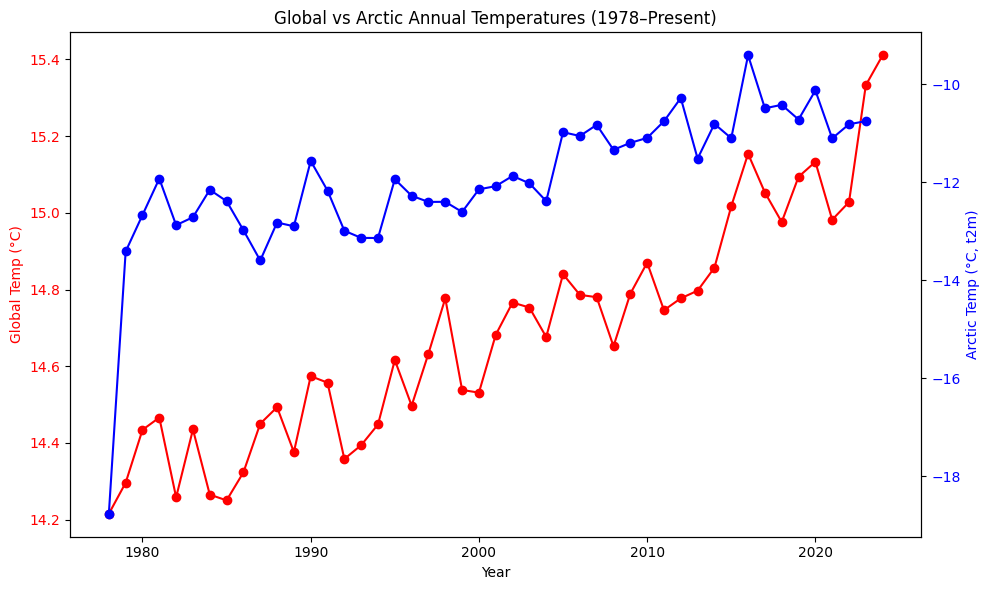

In [ ]:
# PLOT
fig, ax1 = plt.subplots(figsize=(10,6))

color_g = 'red'
color_a = 'blue'

# Global temperature
ax1.plot(global_temp['year'], global_temp['global_temp_c'], color=color_g, marker='o', label='Global Temp')
ax1.set_xlabel("Year")
ax1.set_ylabel("Global Temp (°C)", color=color_g)
ax1.tick_params(axis='y', labelcolor=color_g)

# Arctic temperature
ax2 = ax1.twinx()
ax2.plot(arctic_temp['year'], arctic_temp.iloc[:, 1], color=color_a, marker='o', label='Arctic Temp')
ax2.set_ylabel("Arctic Temp (°C, t2m)", color=color_a)
ax2.tick_params(axis='y', labelcolor=color_a)

# Title
plt.title("Global vs Arctic Annual Temperatures (1978–Present)")

fig.tight_layout()
plt.show()

- **Red line (left axis):** Global mean temperature.  
- **Blue line (right axis):** Arctic mean temperature (t2m).  
- Both show a steady upward trend, but the Arctic increases **much faster**, illustrating **Arctic amplification**.  
- The y-axes differ because the Arctic baseline is colder, but the *rate of warming* is the key takeaway.  

### Compute & Plot temperature anomalies (1981–2010 baseline)
- **Baseline:** Use the climatological period **1981–2010** (standard in many climate studies) to compute mean temperatures.
- **Global anomaly:** `global_temp_c − mean(1981–2010)`.
- **Arctic anomaly:** yearly Arctic mean (t2m) minus its **1981–2010** mean.
- **Plot:** Overlay global (red) and Arctic (blue) anomalies with a 0-line to show departures from the baseline. 

In [ ]:
# CALCULATE ANOMALIES
# Define baseline period
baseline_years = (1981, 2010)

# Global anomaly
baseline_global = global_temp[(global_temp['year'] >= baseline_years[0]) &
                              (global_temp['year'] <= baseline_years[1])]['global_temp_c'].mean()
global_temp['anomaly'] = global_temp['global_temp_c'] - baseline_global

# Arctic anomaly
baseline_arctic = arctic_temp[(arctic_temp['year'] >= baseline_years[0]) &
                              (arctic_temp['year'] <= baseline_years[1])].iloc[:, 1].mean()
arctic_temp['anomaly'] = arctic_temp.iloc[:, 1] - baseline_arctic

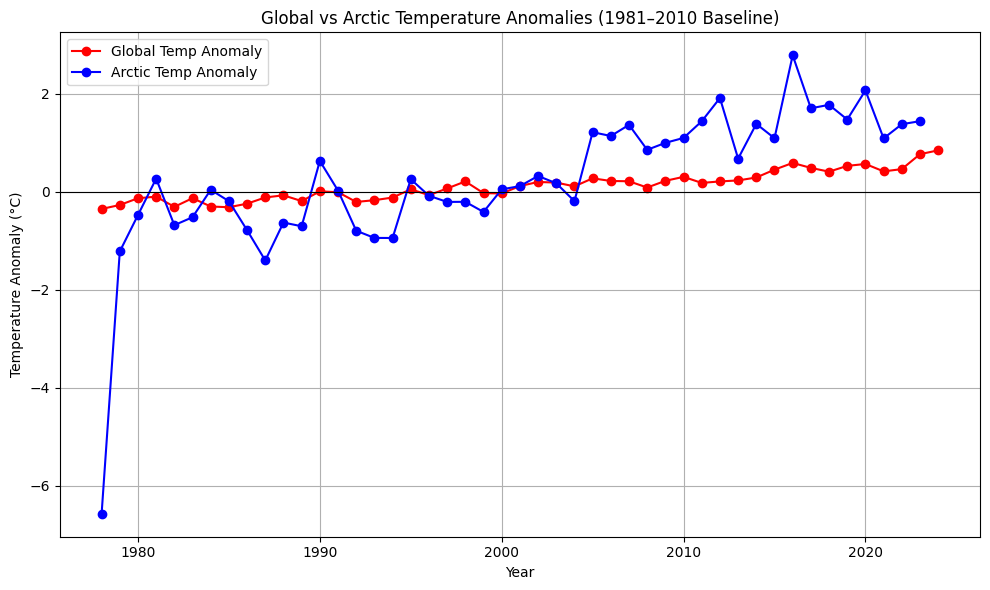

In [ ]:
# PLOT
plt.figure(figsize=(10,6))
plt.plot(global_temp['year'], global_temp['anomaly'], color='red', marker='o', label='Global Temp Anomaly')
plt.plot(arctic_temp['year'], arctic_temp['anomaly'], color='blue', marker='o', label='Arctic Temp Anomaly')
plt.axhline(0, color='black', linewidth=0.8)

plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.title(f"Global vs Arctic Temperature Anomalies ({baseline_years[0]}–{baseline_years[1]} Baseline)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Anomalies are deviations from the **1981–2010 climatological average**.  
- **Red line:** Global temperature anomaly.  
- **Blue line:** Arctic temperature anomaly.  
- Both have risen since 1978, but Arctic anomalies are **consistently larger**, often exceeding +2 °C while global anomalies remain closer to +1 °C.  
- This gap highlights **Arctic amplification** — the Arctic is warming at roughly **twice the global rate**.  
